In [1]:
import os
import shutil

kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

if os.path.exists("kaggle.json"):
    shutil.move("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)
print("✅ Kaggle API Key is set up successfully!")


✅ Kaggle API Key is set up successfully!


In [2]:
os.environ["KAGGLE_CONFIG_DIR"] = kaggle_dir
!kaggle competitions download -c cifar-10

... resuming from 183500800 bytes (566645848 bytes left) ...




 24%|██▍       | 175M/715M [00:00<?, ?B/s]
 25%|██▍       | 176M/715M [00:02<19:15, 490kB/s]
 25%|██▍       | 177M/715M [00:03<13:12, 712kB/s]
 25%|██▍       | 178M/715M [00:04<11:48, 795kB/s]
 25%|██▌       | 179M/715M [00:05<11:14, 834kB/s]
 25%|██▌       | 180M/715M [00:06<11:53, 787kB/s]
 25%|██▌       | 181M/715M [00:08<12:35, 741kB/s]
 25%|██▌       | 182M/715M [00:10<13:18, 700kB/s]
 26%|██▌       | 183M/715M [00:11<11:52, 783kB/s]
 26%|██▌       | 184M/715M [00:12<12:44, 729kB/s]
 26%|██▌       | 185M/715M [00:14<12:37, 734kB/s]
 26%|██▌       | 186M/715M [00:15<13:00, 712kB/s]
 26%|██▌       | 187M/715M [00:16<12:15, 753kB/s]
 26%|██▋       | 188M/715M [00:17<11:01, 837kB/s]
 26%|██▋       | 189M/715M [00:18<10:11, 903kB/s]
 27%|██▋       | 190M/715M [00:19<09:39, 950kB/s]
 27%|██▋       | 191M/715M [00:20<09:39, 949kB/s]
 27%|██▋       | 192M/715M [00:22<09:32, 959kB/s]
 27%|██▋       | 193M/715M [00:23<10:00, 911kB/s]
 27%|██▋       | 194M/715M [00:24<10:03, 906kB/s]
 27%|█

In [3]:
from zipfile import ZipFile
dataset_path = "cifar-10.zip"

with ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("cifar10_data")  
    print("✅ The dataset is extracted successfully!")
os.listdir("cifar10_data")

✅ The dataset is extracted successfully!


['sampleSubmission.csv', 'test.7z', 'train.7z', 'trainLabels.csv']

In [4]:
import py7zr
seven_zip_path = "cifar10_data/train.7z"

with py7zr.SevenZipFile(seven_zip_path, mode='r') as archive:
    archive.extractall(path="cifar10_train_data")  # Extract to a folder
    print("✅ 7z file extracted successfully!")

os.listdir("cifar10_train_data")

✅ 7z file extracted successfully!


['train']

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [6]:
train_folder = "cifar10_train_data"
filenames = os.listdir(train_folder)

In [7]:
type(filenames)

list

In [8]:
len(filenames)

1

In [9]:
print(filenames[0:5])
print(filenames[-5:])

['train']
['train']


In [10]:
labels_path = "cifar10_data/trainLabels.csv" 
labels_df = pd.read_csv(labels_path)

In [11]:
labels_df.shape

(50000, 2)

In [12]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [13]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [14]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [15]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [16]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [17]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

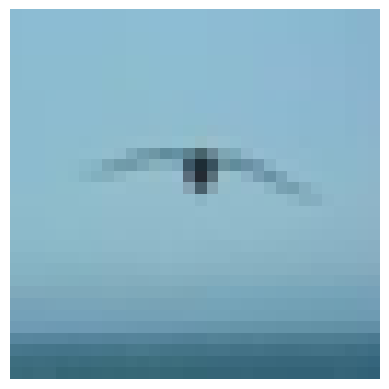

In [24]:
import cv2
image_path = "cifar10_train_data/train/13076.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")  
plt.show()

In [25]:
import os

image_path = "cifar10_train_data/train/36352.png"

# Check if the file exists
if os.path.exists(image_path):
    print(f"✅ Image '{image_path}' found!")
else:
    print(f"❌ Image '{image_path}' NOT found! Check the dataset.")


✅ Image 'cifar10_train_data/train/36352.png' found!


In [26]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [27]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [28]:
id_list = list(labels_df['id'])

In [29]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [33]:
# convert images to numpy arrays

train_data_folder = "cifar10_train_data/train/"

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [34]:
type(data)

list

In [35]:
len(data)

50000

In [36]:
type(data[0])

numpy.ndarray

In [37]:
data[0].shape

(32, 32, 3)

In [38]:
data[0]     

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [39]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
print(X.shape)
print(Y.shape)


(50000, 32, 32, 3)
(50000,)


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [44]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [45]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [46]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

c:\Users\vivek\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [50]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.2521 - loss: 2.0566 - val_acc: 0.3415 - val_loss: 1.8030
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3510 - loss: 1.8046 - val_acc: 0.3688 - val_loss: 1.7596
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3670 - loss: 1.7617 - val_acc: 0.3792 - val_loss: 1.7309
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3788 - loss: 1.7281 - val_acc: 0.3820 - val_loss: 1.7067
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3824 - loss: 1.7208 - val_acc: 0.3632 - val_loss: 1.7661
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3878 - loss: 1.7083 - val_acc: 0.3870 - val_loss: 1.7054
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.3930 - loss: 1.6937 - val_acc: 0.3972 - val_loss: 1.6740
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3940 - loss: 1.6877 - val_acc: 0.3405 - val_loss: 1.7940
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [51]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [53]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1138s 12us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [54]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [57]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [58]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
  44/1125 ━━━━━━━━━━━━━━━━━━━━ 6:33:23 22s/step - accuracy: 0.1443 - loss: 2.8463

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()